## NOTES:
* embedded is code to calculate each star school rank breakdown of absences percentages
* embedded is code to extract school_ward_int and school_cluster_int columns

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from category_encoders import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv('../../01_data/cleaned_data/school_df_v4.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   code                      109 non-null    int64  
 1   name                      109 non-null    object 
 2   grade_band                109 non-null    object 
 3   enrollment_SY1718         109 non-null    int64  
 4   enrollment_SY1819         109 non-null    int64  
 5   star_score_SY1718         109 non-null    float64
 6   star_score_SY1819         109 non-null    float64
 7   star_rating_SY1718        109 non-null    int64  
 8   star_rating_SY1819        109 non-null    int64  
 9   capacity_SY1718           109 non-null    int64  
 10  capacity_SY1819           109 non-null    int64  
 11  latitude                  109 non-null    float64
 12  longitude                 109 non-null    float64
 13  cluster                   109 non-null    int64  
 14  ward      

In [4]:
data.drop(data[data['code'] == 201].index, inplace = True) # Oyster Adams Bilingual School (Adams) has no attendance data
data.drop(data[data['code'] == 347].index, inplace = True) # Brookland Middle School has no attendance data

In [5]:
X = data.drop(columns = data.filter(regex='^count',axis=1)).drop(columns='name')

In [6]:
X.drop('code', axis = 1, inplace = True)

In [7]:
X_ohe = OneHotEncoder(cols=['grade_band']).fit_transform(X)
X_ohe

c:\programdata\miniconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,grade_band_1,grade_band_2,grade_band_3,grade_band_4,grade_band_5,enrollment_SY1718,enrollment_SY1819,star_score_SY1718,star_score_SY1819,star_rating_SY1718,...,pct_20+_SY1819,pct_0_SY1718,pct_1-5_SY1718,pct_6-10__SY1718,pct_11-20_SY1718,pct_20+_SY1718,budgeted_amount_FY16,budgeted_enrollment_FY16,budgeted_amount_FY17,budgeted_enrollment_FY17
0,1,0,0,0,0,308,313,88.55,88.26,5,...,0.015974,0.379870,0.538961,0.064935,0.016234,0.000000,1.059280e+07,5880,3815456,2674740
2,1,0,0,0,0,243,244,43.85,10.79,3,...,0.086066,0.271605,0.304527,0.238683,0.135802,0.049383,7.429920e+06,2650,3780814,2499672
3,1,0,0,0,0,351,339,36.53,48.54,2,...,0.029499,0.159544,0.424501,0.279202,0.102564,0.034188,8.979878e+06,3660,4533018,3020358
4,1,0,0,0,0,642,620,66.46,73.18,4,...,0.017742,0.323988,0.588785,0.063863,0.015576,0.007788,1.519980e+07,6340,7531184,4677607
5,1,0,0,0,0,484,489,35.32,38.68,2,...,0.010225,0.371901,0.520661,0.097107,0.010331,0.000000,1.102686e+07,4340,5511270,3506981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,0,0,0,1,0,617,667,26.57,22.24,2,...,0.761619,-0.069692,0.059968,0.098865,0.265802,0.645057,1.745768e+07,6860,8919967,5286569
105,0,0,0,1,0,566,545,72.66,74.13,4,...,0.291743,0.084806,0.395760,0.178445,0.196113,0.144876,1.243783e+07,5270,6791997,3355125
106,0,0,0,1,0,195,136,24.88,12.90,2,...,0.955882,-0.005128,0.025641,0.025641,0.025641,0.928205,7.133322e+06,2510,3599053,2721974
107,0,0,0,1,0,260,265,44.70,54.27,3,...,0.283019,0.007692,0.134615,0.188462,0.361538,0.307692,8.835780e+06,3610,4196996,2765707


In [8]:
X_ohe_ss = StandardScaler().fit_transform(X_ohe)

In [9]:
kmeans = KMeans()
kmeans.fit(X_ohe_ss)

KMeans()

In [10]:
kmeans_df = X.copy()
kmeans_df['kmeans_default_labels'] = kmeans.labels_
kmeans_df

,grade_band,enrollment_SY1718,enrollment_SY1819,star_score_SY1718,star_score_SY1819,star_rating_SY1718,star_rating_SY1819,capacity_SY1718,capacity_SY1819,latitude,...,pct_0_SY1718,pct_1-5_SY1718,pct_6-10__SY1718,pct_11-20_SY1718,pct_20+_SY1718,budgeted_amount_FY16,budgeted_enrollment_FY16,budgeted_amount_FY17,budgeted_enrollment_FY17,kmeans_default_labels
0,Elementary,308,313,88.55,88.26,5,5,444,444,38.897565,...,0.379870,0.538961,0.064935,0.016234,0.000000,1.059280e+07,5880,3815456,2674740,2
2,Elementary,243,244,43.85,10.79,3,1,529,529,38.897002,...,0.271605,0.304527,0.238683,0.135802,0.049383,7.429920e+06,2650,3780814,2499672,3
3,Elementary,351,339,36.53,48.54,2,3,400,400,38.879515,...,0.159544,0.424501,0.279202,0.102564,0.034188,8.979878e+06,3660,4533018,3020358,3
4,Elementary,642,620,66.46,73.18,4,4,753,753,38.948231,...,0.323988,0.588785,0.063863,0.015576,0.007788,1.519980e+07,6340,7531184,4677607,2
5,Elementary,484,489,35.32,38.68,2,2,508,508,38.864350,...,0.371901,0.520661,0.097107,0.010331,0.000000,1.102686e+07,4340,5511270,3506981,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,High,617,667,26.57,22.24,2,2,1135,1135,38.907627,...,-0.069692,0.059968,0.098865,0.265802,0.645057,1.745768e+07,6860,8919967,5286569,1
105,High,566,545,72.66,74.13,4,4,600,600,38.913446,...,0.084806,0.395760,0.178445,0.196113,0.144876,1.243783e+07,5270,6791997,3355125,0
106,High,195,136,24.88,12.90,2,1,-1,-1,38.920430,...,-0.005128,0.025641,0.025641,0.025641,0.928205,7.133322e+06,2510,3599053,2721974,7
107,High,260,265,44.70,54.27,3,3,512,512,38.901992,...,0.007692,0.134615,0.188462,0.361538,0.307692,8.835780e+06,3610,4196996,2765707,4


In [11]:
kmeans.inertia_

1257.7081147807373

In [12]:
# sns.pairplot(kmeans_df, hue='kmeans_default_labels', corner=True);

In [13]:
kmeans_df.groupby('kmeans_default_labels').mean().head(2)

,enrollment_SY1718,enrollment_SY1819,star_score_SY1718,star_score_SY1819,star_rating_SY1718,star_rating_SY1819,capacity_SY1718,capacity_SY1819,latitude,longitude,...,pct_20+_SY1819,pct_0_SY1718,pct_1-5_SY1718,pct_6-10__SY1718,pct_11-20_SY1718,pct_20+_SY1718,budgeted_amount_FY16,budgeted_enrollment_FY16,budgeted_amount_FY17,budgeted_enrollment_FY17
kmeans_default_labels,,,,,,,,,,,,,,,,,,,,,
0,478.733333,473.933333,52.844667,56.096667,3.000000,3.333333,556.866667,556.866667,38.925088,-77.01811,...,0.070180,0.175685,0.40902,0.222716,0.139078,0.053500,1.114481e+07,4363.933333,6.054869e+06,3845290.8
1,591.571429,540.571429,16.305714,14.574286,1.428571,1.285714,875.857143,875.857143,38.901961,-76.99256,...,0.670986,-0.026869,0.12223,0.125365,0.213809,0.565465,1.796490e+07,6724.285714,9.614109e+06,5170421.0


In [14]:
kmeans = KMeans(n_clusters=11)
kmeans.fit(X_ohe_ss)

KMeans(n_clusters=11)

In [15]:
kmeans_df = X.copy()
kmeans_df['kmeans_default_labels'] = kmeans.labels_
kmeans_df.head(2)

,grade_band,enrollment_SY1718,enrollment_SY1819,star_score_SY1718,star_score_SY1819,star_rating_SY1718,star_rating_SY1819,capacity_SY1718,capacity_SY1819,latitude,...,pct_0_SY1718,pct_1-5_SY1718,pct_6-10__SY1718,pct_11-20_SY1718,pct_20+_SY1718,budgeted_amount_FY16,budgeted_enrollment_FY16,budgeted_amount_FY17,budgeted_enrollment_FY17,kmeans_default_labels
0,Elementary,308,313,88.55,88.26,5,5,444,444,38.897565,...,0.379870,0.538961,0.064935,0.016234,0.000000,1.059280e+07,5880,3815456,2674740,0
2,Elementary,243,244,43.85,10.79,3,1,529,529,38.897002,...,0.271605,0.304527,0.238683,0.135802,0.049383,7.429920e+06,2650,3780814,2499672,9


In [16]:
kmeans.inertia_

1082.2695142150988

In [17]:
# sns.pairplot(kmeans_df, hue='kmeans_default_labels', corner=True);
# plt.savefig(f'kmeans_k=11_results')

In [18]:
kmeans_df.groupby('kmeans_default_labels').mean().head(2)

,enrollment_SY1718,enrollment_SY1819,star_score_SY1718,star_score_SY1819,star_rating_SY1718,star_rating_SY1819,capacity_SY1718,capacity_SY1819,latitude,longitude,...,pct_20+_SY1819,pct_0_SY1718,pct_1-5_SY1718,pct_6-10__SY1718,pct_11-20_SY1718,pct_20+_SY1718,budgeted_amount_FY16,budgeted_enrollment_FY16,budgeted_amount_FY17,budgeted_enrollment_FY17
kmeans_default_labels,,,,,,,,,,,,,,,,,,,,,
0,445.400000,453.1,72.300333,72.385667,4.033333,4.133333,492.2,495.533333,38.922965,-77.035436,...,0.031948,0.324531,0.535557,0.100861,0.029461,0.009591,9.895535e+06,4387.333333,4.902734e+06,3549703.2
1,474.333333,472.5,51.571667,52.641667,3.166667,3.000000,450.0,450.000000,38.872580,-77.006453,...,0.163768,0.065706,0.271157,0.247455,0.262912,0.152769,1.117029e+07,4898.333333,5.879108e+06,3753279.0


In [19]:
def find_best_silhouette_kmeans(df): 
    max_score=-1
    for k in range(1,20):
        kmeans = KMeans(n_clusters=k).fit(df)
        if len(set(kmeans.labels_)) > 1:
            score = silhouette_score(df, kmeans.labels_)
            nclusters = len(set(kmeans.labels_))
            if score > max_score:
                max_score = score
                inertia = kmeans.inertia_
                best_clusters = nclusters
    print(f'Best silhouette score was {round(max_score, 2)}')
    print(f'Model inertia was {inertia}')
    print(f'Model found {best_clusters} clusters.')
    return

In [20]:
def find_best_silhouette_dbscan(df): 
    max_score=-1     

    for eps in np.linspace(.2, 5, 50):
        for minsamples in range(2, len(df/2)):
            dbscan = DBSCAN(eps=eps, min_samples=minsamples)
            dbscan.fit(df)
            if len(set(dbscan.labels_)) > 1:
                score = silhouette_score(df, dbscan.labels_)
                nclusters = len(set(dbscan.labels_))
                if score > max_score:
                    max_score = score
                    best_eps = eps
                    best_minsamples = minsamples
                    best_clusters = nclusters
    print(f'Best silhouette score was {round(max_score, 2)}')
    print(f'Best eps was {round(best_eps, 2)}')
    print(f'Best min_samples was {best_minsamples}.')
    print(f'Model found {best_clusters} clusters.')
    return

In [21]:
find_best_silhouette_dbscan(X_ohe_ss)

Best silhouette score was 0.32
Best eps was 5.0
Best min_samples was 7.
Model found 2 clusters.


In [22]:
find_best_silhouette_kmeans(X_ohe_ss)

c:\programdata\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Best silhouette score was 0.28
Model inertia was 1096.4589851890737
Model found 10 clusters.


In [23]:
Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_ohe_ss)
    Sum_of_squared_distances.append(km.inertia_)

c:\programdata\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


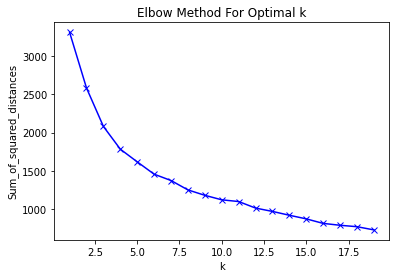

In [24]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()
# plt.savefig(f'elbow_plot_kmeans_results')

### Would have expected k cluster of closer to 6 not 11 ....

In [25]:
pca = PCA()
X_ohe_ss_pca = pca.fit_transform(X_ohe_ss)

In [26]:
X_ohe_ss_pca.shape

(107, 31)

In [27]:
pca.explained_variance_

array([9.23255172e+00, 7.98085561e+00, 3.10411808e+00, 2.19823442e+00,
       1.52864958e+00, 1.27106308e+00, 1.15063230e+00, 9.91575884e-01,
       6.12170731e-01, 5.49416864e-01, 5.05561345e-01, 4.26746118e-01,
       4.02624352e-01, 3.24929281e-01, 2.46060739e-01, 1.75691010e-01,
       1.56449265e-01, 1.00574168e-01, 8.08695151e-02, 6.93348109e-02,
       5.13718223e-02, 4.42116541e-02, 3.45419510e-02, 2.12571790e-02,
       1.78590473e-02, 7.48072059e-03, 6.66484423e-03, 9.56738071e-04,
       2.08547097e-18, 1.89712216e-18, 2.38320412e-32])

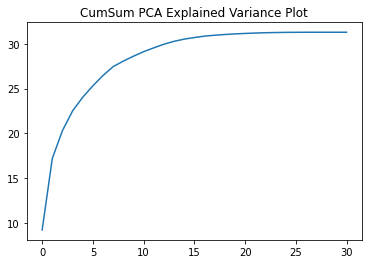

In [28]:
plt.plot(np.cumsum(pca.explained_variance_))
plt.title("CumSum PCA Explained Variance Plot");
# plt.savefig(f'cumsum_plot_pca_results')

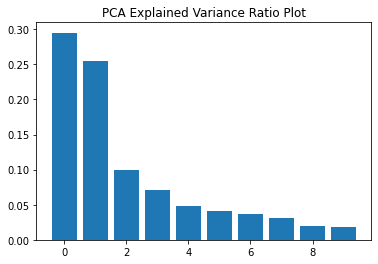

In [29]:
plt.bar(range(10), pca.explained_variance_ratio_[:10])
plt.title("PCA Explained Variance Ratio Plot");
# plt.savefig(f'exp_var_ratio_plot_pca_results')

In [30]:
np.cumsum(pca.explained_variance_ratio_[:10])

array([0.29504084, 0.55008175, 0.64927877, 0.71952684, 0.76837727,
       0.80899611, 0.84576639, 0.87745377, 0.89701666, 0.91457414])

In [31]:
pca = PCA(4)
X_ohe_ss_pca = pca.fit_transform(X_ohe_ss)

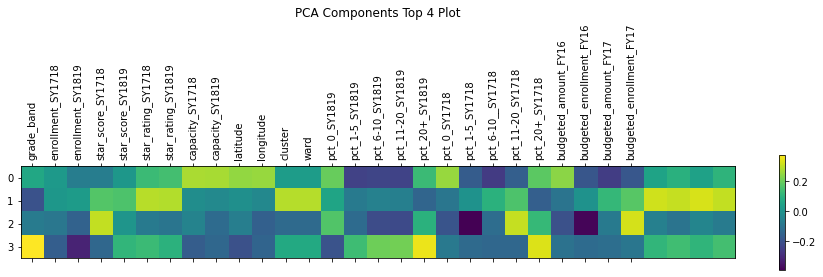

In [32]:
plt.matshow(pca.components_)
plt.xticks(range(len(X.columns)), X.columns, rotation = 90);
plt.colorbar();
plt.title("PCA Components Top 4 Plot");
# plt.savefig(f'pca4_components_plot_results')

In [33]:
pca.components_[0]

array([ 0.07098488,  0.02355903, -0.06636512, -0.0659712 ,  0.01453673,
        0.13192521,  0.14748992,  0.27903775,  0.27592877,  0.25296165,
        0.25756136,  0.0326011 ,  0.0333796 ,  0.19788122, -0.23835619,
       -0.23114803, -0.23546151,  0.13188198,  0.25942209, -0.16625891,
       -0.25884753, -0.15874282,  0.18256145,  0.24329994, -0.18496803,
       -0.25127184, -0.18348346,  0.05573137,  0.09667322,  0.04836583,
        0.10985406])

In [34]:
pca.components_.sum(axis = 1)

array([ 0.80476253,  2.47304632, -1.95405422,  0.29406086])